In [78]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats

In [2]:
#read the train and test data
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [3]:
#check the first fewrows of the train data
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
##check the first fewrows of the test data
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
#concise summary of the train DataFrame
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#concise summary of the test DataFrame
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
#view some basic statistical details of the train dataframe
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#view some basic statistical details of the test dataframe
testdf.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

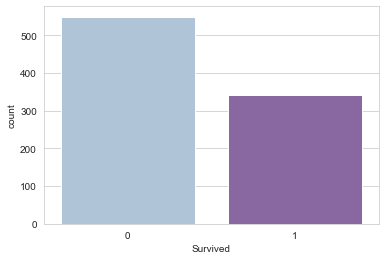

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=traindf,palette='BuPu')

#### From the graph above, more people died rom the crash

<AxesSubplot:xlabel='Survived', ylabel='count'>

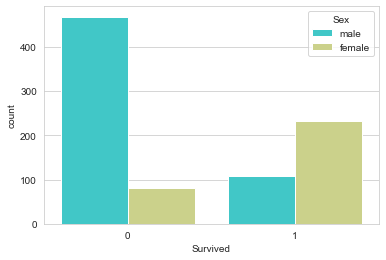

In [19]:
sns.countplot(x='Survived',hue='Sex',data=traindf,palette='rainbow')

#### From the graph above, most of the casualities are men and women has the highest number of survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

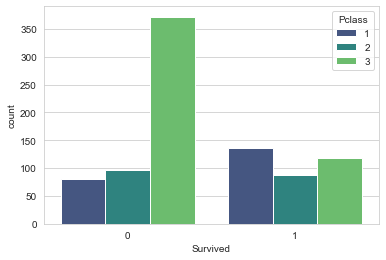

In [22]:
sns.countplot(x='Survived',data=traindf,hue='Pclass',palette='viridis')

#### Most survivors are from the passenger class 3

<AxesSubplot:xlabel='Age'>

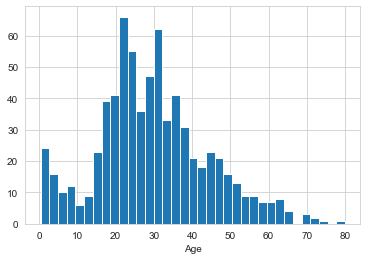

In [26]:
plt.xlabel('Age')
traindf['Age'].hist(bins=35)

#### Most passengers on the ship are within the age of 20 - 30

<AxesSubplot:xlabel='Fare'>

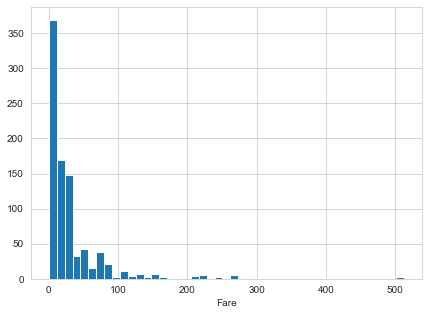

In [27]:
plt.figure(figsize=(7,5))
plt.xlabel('Fare')
traindf['Fare'].hist(bins=45)

#### Seems that class-3 passengers are highly populated than class-1 passengers.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

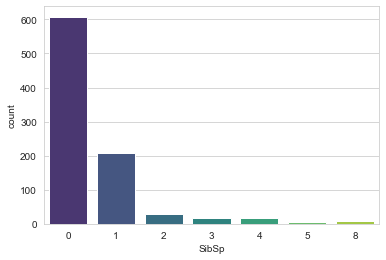

In [28]:
sns.countplot(x='SibSp',data=traindf,palette='viridis')

#### Most of the passengers on the ship sailed alone without any spouse or sibling

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

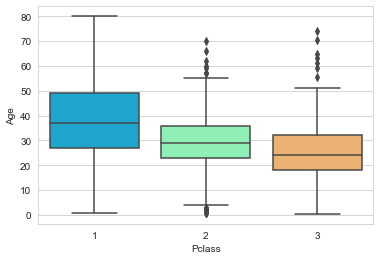

In [29]:
sns.boxplot(data=traindf,y='Age',x='Pclass',palette='rainbow')

#### From the observation the median age of class-1 is to be 37, class-2 to be 29 and class-3 to be 24.

## Data Cleaning

<AxesSubplot:>

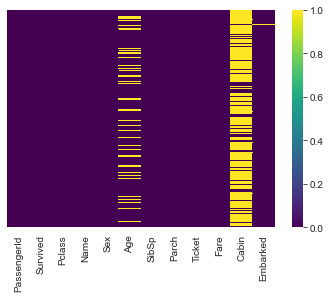

In [34]:
sns.heatmap(traindf.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

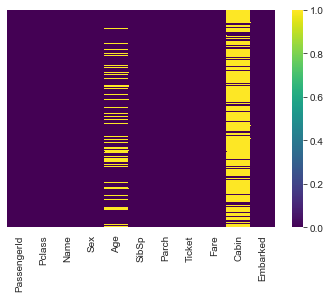

In [35]:
sns.heatmap(testdf.isnull(),yticklabels=False,cmap='viridis')

In [6]:
#check for the number of missing values
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#check for the number of missing values
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
#create new table called Title by taking the titles off the names in the Name column
traindf['Title'] = traindf.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
traindf['Title'] = traindf['Title'].replace(['Ms', 'Mlle'], 'Miss')
traindf['Title'] = traindf['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
traindf['Title'] = traindf['Title'].replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

testdf['Title'] = testdf.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
testdf['Title'] = testdf['Title'].replace(['Ms', 'Mlle'], 'Miss')
testdf['Title'] = testdf['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
testdf['Title'] = testdf['Title'].replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

In [39]:
# Mean of the Age of class 1 passsengers
traindf[traindf.Pclass==1]['Age'].mean()

38.233440860215055

In [40]:
# Mean of the Age of class 2 passsengers
traindf[traindf.Pclass==2]['Age'].mean()

29.87763005780347

In [41]:
# Mean of the Age of class 3 passsengers
traindf[traindf.Pclass==3]['Age'].mean()

25.14061971830986

In [42]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29.9

        else:
            return 26.4

    else:
        return Age

In [43]:
# Replace the missing values in the Age column with the mean
traindf['Age'] = traindf[['Age','Pclass']].apply(impute_age,axis=1)

In [49]:
# Replace the missing values in the Embarked column with S
traindf['Embarked'].fillna('S', inplace=True)

In [44]:
# Mean of the Age of class 1 passsengers
testdf[testdf.Pclass==1]['Age'].mean()

40.91836734693877

In [45]:
# Mean of the Age of class 2 passsengers
testdf[testdf.Pclass==2]['Age'].mean()

28.7775

In [46]:
# Mean of the Age of class 3 passsengers
testdf[testdf.Pclass==3]['Age'].mean()

24.02794520547945

In [47]:
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40.9

        elif Pclass == 2:
            return 28.8

        else:
            return 24

    else:
        return Age

In [48]:
# Replace the missing values in the Age column with the mean
testdf['Age'] = testdf[['Age','Pclass']].apply(impute_age1,axis=1)

In [18]:
# Mean of the fare
testdf['Fare'].mean()

35.6271884892086

In [50]:
# Replace the missing values in the Fare column witth the mean
testdf['Fare'] = testdf['Fare'].fillna(testdf['Fare'].mean())

In [51]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [53]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [54]:
#Drop irrelevant columns
traindf = traindf.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)
testdf = testdf.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [55]:
#Create dummy variales
traindf[ 'Male']=pd.get_dummies(traindf.Sex, drop_first=True).astype('int64')
traindf[['S','Q']]=pd.get_dummies(traindf.Embarked,drop_first=True).astype('int64')
traindf[[2,1]]=pd.get_dummies(traindf.Pclass,drop_first=True).astype('int64')

testdf[ 'Male']=pd.get_dummies(testdf.Sex,drop_first=True).astype('int64')
testdf[['S','Q']]=pd.get_dummies(testdf.Embarked,drop_first=True).astype('int64')
testdf[[2,1]]=pd.get_dummies(testdf.Pclass,drop_first=True).astype('int64')

In [57]:
#Label encode the title column
le=LabelEncoder()

In [58]:
traindf.Title=le.fit_transform(traindf.Title).astype('int64')
testdf.Title=le.transform(testdf.Title).astype('int64')

In [59]:
traindf = traindf.drop(['Sex', 'Embarked'], axis=1)
testdf = testdf.drop(['Sex', 'Embarked'], axis=1)

In [60]:
traindf1 = traindf.drop(['Survived'], axis=1)
testdf1 = testdf.drop(['PassengerId'], axis=1)

<AxesSubplot:>

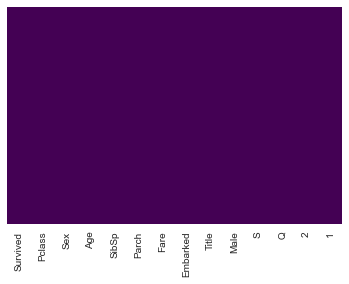

In [56]:
#Check for missing values
sns.heatmap(traindf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Feature Engineering

In [62]:
X = traindf1

In [63]:
# perform standard scaling on the training data
X_train = StandardScaler().fit_transform(X)
X_train

array([[ 0.82737724, -0.56716951,  0.43279337, ...,  0.61583843,
        -0.51015154,  0.90258736],
       [-1.56610693,  0.65191908,  0.43279337, ..., -1.62380254,
        -0.51015154, -1.10792599],
       [ 0.82737724, -0.26239736, -0.4745452 , ...,  0.61583843,
        -0.51015154,  0.90258736],
       ...,
       [ 0.82737724, -0.23192015,  0.43279337, ...,  0.61583843,
        -0.51015154,  0.90258736],
       [-1.56610693, -0.26239736, -0.4745452 , ..., -1.62380254,
        -0.51015154, -1.10792599],
       [ 0.82737724,  0.19476086, -0.4745452 , ..., -1.62380254,
        -0.51015154,  0.90258736]])

In [64]:
y_train = traindf['Survived']

In [65]:
X_test = testdf1

In [66]:
# perform standard scaling on the testing data
X_test = StandardScaler().fit_transform(X_test)
X_test

array([[ 0.87348191,  0.39353281, -0.49947002, ..., -1.35067551,
        -0.5349335 ,  0.95782629],
       [ 0.87348191,  1.35870788,  0.61699237, ...,  0.74037028,
        -0.5349335 ,  0.95782629],
       [-0.31581919,  2.51691795, -0.49947002, ..., -1.35067551,
         1.86939125, -1.04403065],
       ...,
       [ 0.87348191,  0.70238883, -0.49947002, ...,  0.74037028,
        -0.5349335 ,  0.95782629],
       [ 0.87348191, -0.41721424, -0.49947002, ...,  0.74037028,
        -0.5349335 ,  0.95782629],
       [ 0.87348191, -0.41721424,  0.61699237, ..., -1.35067551,
        -0.5349335 ,  0.95782629]])

In [67]:
X_train.shape, y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [69]:
logregression = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
xgboost =xgb.XGBClassifier()
adaboost = AdaBoostClassifier(random_state=1)

In [70]:
logregression.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [71]:
print("Accuracy of train(Logistic Regression): {}".format(round(logregression.score(X_train,y_train) * 100, 2)))
print()
print("Accuracy of train(SVM): {}".format(round(svc.score(X_train,y_train) * 100, 2)))
print()
print("Accuracy of train(KNN): {}".format(round(knn.score(X_train,y_train) * 100, 2)))
print()
print("Accuracy of train(Random Forrest): {}".format(round(random_forest.score(X_train,y_train) * 100, 2)))
print()
print("Accuracy of train(Decision Tree): {}".format(round(decision_tree.score(X_train,y_train) * 100, 2)))
print()
print("Accuracy of train(XG Boost): {}".format(round(xgboost.score(X_train,y_train) * 100, 2)))
print()
print("Accuracy of train(Ada Boost): {}".format(round(adaboost.score(X_train,y_train) * 100, 2)))

Accuracy of train(Logistic Regression): 80.47

Accuracy of train(SVM): 84.85

Accuracy of train(KNN): 86.64

Accuracy of train(Random Forrest): 98.2

Accuracy of train(Decision Tree): 98.2

Accuracy of train(XG Boost): 87.88

Accuracy of train(Ada Boost): 83.84


#### Random forest has the highest accuracy score on the training data so we will work with the model

In [76]:
# define models and parameters
rfc=RandomForestClassifier(random_state=42)

In [79]:
# define grid search
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
            }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, cv= cv, scoring='accuracy',error_score=0)
CV_rfc.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (CV_rfc.best_score_, CV_rfc.best_params_))

Best: 0.837632 using {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}


In [82]:
#Predict with the best parameters
y_pred = CV_rfc.predict(X_test)

In [84]:
submission = pd.DataFrame(
    {
        'PassengerId': testdf["PassengerId"], 
        'Survived': y_pred,
    }
)
submission.to_csv(f"submission_final.csv", index=False)

### Accuracy score of  0.78